# ORIE 4580/5580/5581 Assignment 3

#### Students: Xingwei Li (xl988)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)

### Instructions


* Due Thursday September 25, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [1]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

<hr><hr>

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


<hr>

**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).

<hr>

In [2]:
# Functions to visualize LCG sequence on clock (see demo notebook)


In [3]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)


x_n (mod 16) sequence starting at 1:  [1, 5, 9, 13]
Period (x): 4
y_n (mod 7)  sequence starting at 1:  [1, 2, 4]
Period (y): 3


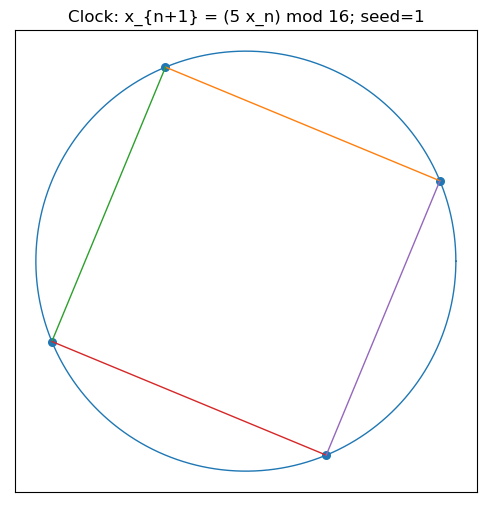

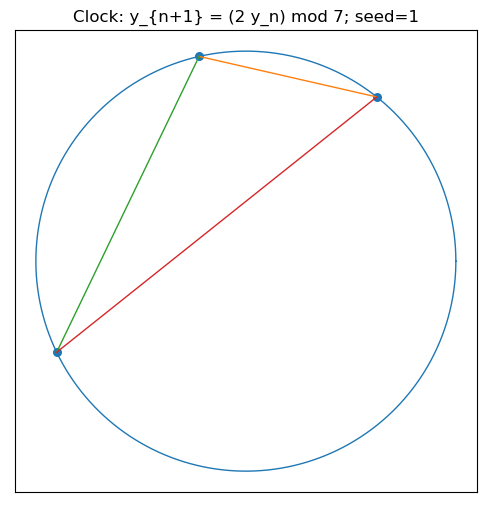

In [5]:
# Ans
from math import tau

def lcg_sequence(multiplier, modulus, seed):
    """Generate the LCG sequence (multiplicative; c=0) until it returns to seed (exclusive of final repeat)."""
    seq = [seed]
    x = seed
    while True:
        x = (multiplier * x) % modulus
        if x == seed:
            break
        seq.append(x)
    return seq

def clock_plot(sequence, modulus, title, save_path=None):
    """Plot points on the unit circle at angles 2π * (val/modulus) and connect in order."""
    angles = [ (val % modulus) / modulus * tau for val in sequence ]
    xs = np.cos(angles)
    ys = np.sin(angles)
    
    fig = plt.figure(figsize=(6, 6))
    ax = plt.gca()
    
    # Draw unit circle
    circle_theta = np.linspace(0, tau, 400)
    ax.plot(np.cos(circle_theta), np.sin(circle_theta), linewidth=1)
    
    # Connect successive points, and close the loop
    for i in range(len(xs)):
        j = (i + 1) % len(xs)
        ax.plot([xs[i], xs[j]], [ys[i], ys[j]], linewidth=1)
    
    # Scatter points
    ax.scatter(xs, ys, s=30)
    
    # Styling
    ax.set_aspect('equal', adjustable='box')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_title(title)
    
    if save_path:
        fig.savefig(save_path, dpi=200, bbox_inches='tight')
    plt.show()

# Generate sequences
x_seq = lcg_sequence(multiplier=5, modulus=16, seed=1)
y_seq = lcg_sequence(multiplier=2, modulus=7, seed=1)

# Display basic info for verification
print("x_n (mod 16) sequence starting at 1: ", x_seq)
print("Period (x):", len(x_seq))
print("y_n (mod 7)  sequence starting at 1: ", y_seq)
print("Period (y):", len(y_seq))

# Make the two separate clock plots
clock_plot(x_seq, 16, "Clock: x_{n+1} = (5 x_n) mod 16; seed=1", save_path="lcg_clock_x.png")
clock_plot(y_seq, 7,  "Clock: y_{n+1} = (2 y_n) mod 7; seed=1",  save_path="lcg_clock_y.png")

<hr>

**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.

<hr>

z_n sequence: [2, 7, 13, 14, 3, 9, 10, 15, 5, 6, 11, 1]
Period (z): 12


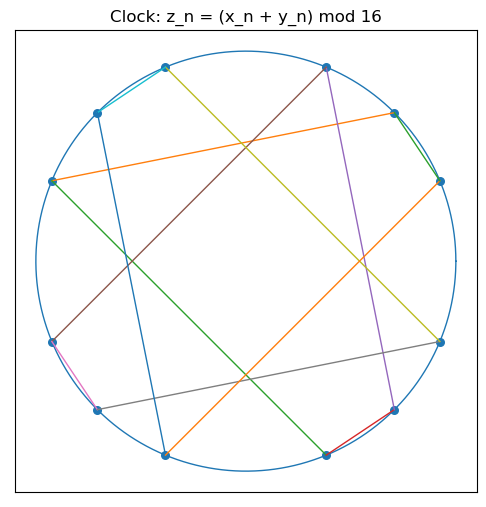

In [7]:
import math

def lcm(a, b):
    return abs(a * b) // math.gcd(a, b)

period_x = len(x_seq)
period_y = len(y_seq)
combined_period = lcm(period_x, period_y)

# Generate z sequence
z_seq = [ (x_seq[i % period_x] + y_seq[i % period_y]) % 16 for i in range(combined_period) ]

print("z_n sequence:", z_seq)
print("Period (z):", len(z_seq))

clock_plot(z_seq, 16, "Clock: z_n = (x_n + y_n) mod 16")


___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.

- For \(x_n\) defined by  

  $$
  x_{n+1} = 5x_n \pmod{16}, \quad x_0=1
  $$  

  the sequence is \([1,5,9,13]\).  
  **Period: 4**

- For \(y_n\) defined by  

  $$
  y_{n+1} = 2y_n \pmod{7}, \quad y_0=1
  $$  

  the sequence is \([1,2,4]\).  
  **Period: 3**

- For the combined sequence  

  $$
  z_n = (x_n + y_n) \pmod{16}
  $$  

  the two base cycles must both align.   

  $$
  \operatorname{lcm}(4,3) = 12
  $$  

  The cycle is \([2,7,13,14,3,9,10,15,5,6,11,1]\).  
  **Period: 12**




___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.

We compute the pseudoinverse $$F^{-1}(y)\ $$ piece by piece.

- For \(y = 0\):  

$$
F^{-1}(0) = 0
$$

- For \(0 < y < \tfrac{1}{2}\):  

$$
F(x) = x \quad \Rightarrow \quad F^{-1}(y) = y
$$

- For \(y = \tfrac{1}{2}\):  

$$
F^{-1}\!\left(\tfrac{1}{2}\right) = \tfrac{1}{2}
$$

- For \(\tfrac{1}{2} < y < 1\):  

$$
F^{-1}(y) = 1
$$

- For \(y = 1\):  

$$
F^{-1}(1) = 1
$$

#### Final expression:

$$
F^{-1}(y) =
\begin{cases}
0 & y = 0, \\[6pt]
y & 0 < y < \tfrac{1}{2}, \\[6pt]
\tfrac{1}{2} & y = \tfrac{1}{2}, \\[6pt]
1 & \tfrac{1}{2} < y \le 1
\end{cases}
$$


___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

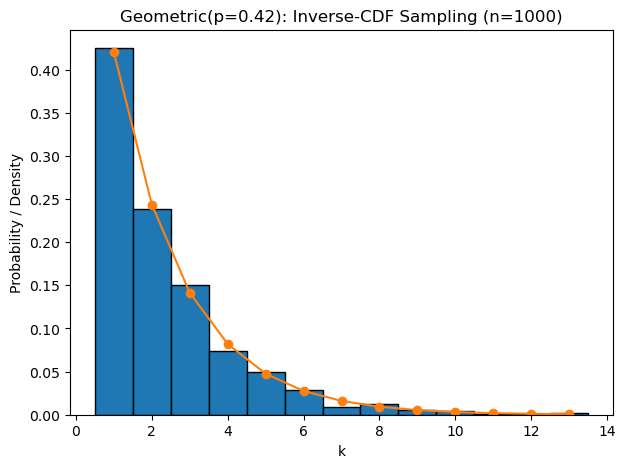

Sample mean: 2.364
Theoretical mean 1/p: 2.380952380952381


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

rng = np.random.default_rng(42)

def geometric_inverse_sample(p, size, rng):
    # X = ceil( log(1-U) / log(1-p) ), U ~ Uniform(0,1)
    U = rng.random(size=size)
    return np.ceil(np.log(1.0 - U) / np.log(1.0 - p)).astype(int)

# parameters
p = 0.42
n = 1000

samples = geometric_inverse_sample(p, n, rng)

# histogram bins centered at integers
k_max = int(np.percentile(samples, 99.5)) + 3
bins = np.arange(0.5, k_max + 1.5, 1.0)

plt.figure(figsize=(7,5))
plt.hist(samples, bins=bins, density=True, edgecolor='black')

# overlay theoretical PMF (scipy's geom has support {1,2,...})
k_vals = np.arange(1, k_max + 1)
plt.plot(k_vals, geom(p).pmf(k_vals), marker='o', linestyle='-')

plt.title("Geometric(p=0.42): Inverse-CDF Sampling (n=1000)")
plt.xlabel("k")
plt.ylabel("Probability / Density")
plt.show()

print("Sample mean:", samples.mean())
print("Theoretical mean 1/p:", 1.0/p)


___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.

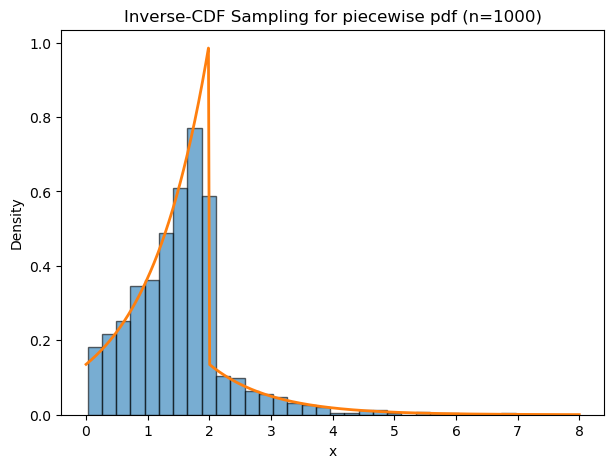

Sample mean: 1.5182825699863574


In [9]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(7)

def sample_piecewise_pdf(n, rng):
    U = rng.random(n)
    thresh = 1.0 - np.exp(-2.0)  # F(2)
    X = np.empty(n)
    # branch 1: 0 <= x <= 2
    mask1 = U < thresh
    X[mask1] = 2.0 + np.log(U[mask1] + np.exp(-2.0))
    # branch 2: x >= 2
    mask2 = ~mask1
    X[mask2] = -np.log(1.0 - U[mask2])
    return X

# draw samples
n = 1000
samples = sample_piecewise_pdf(n, rng)

# true pdf for overlay
def pdf_true(x):
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    mask1 = (x >= 0) & (x <= 2)
    mask2 = (x > 2)
    out[mask1] = np.exp(x[mask1] - 2.0)
    out[mask2] = np.exp(-x[mask2])
    return out

# plot
xs = np.linspace(0, 8, 400)
plt.figure(figsize=(7,5))
plt.hist(samples, bins=30, density=True, edgecolor='black', alpha=0.6)
plt.plot(xs, pdf_true(xs), linewidth=2)
plt.title("Inverse-CDF Sampling for piecewise pdf (n=1000)")
plt.xlabel("x")
plt.ylabel("Density")
plt.show()

print("Sample mean:", samples.mean())


### Ans.

The histogram of 1000 generated samples is shown above together with the true p.d.f.

- For the region $ 0 \leq x \leq 2 $, the histogram increases towards $ x=2 $, which matches the theoretical density $f(x) = e^{\,x-2}$.
- For $x > 2$, the histogram shows an exponential decay, consistent with the density $f(x) = e^{-x}$.
- The sample mean is approximately $1.52$, which aligns well with the theoretical behavior of the distribution.

Overall, the histogram and the theoretical curve are in close agreement, confirming that the inverse transform sampling
algorithm correctly generates random samples from the specified distribution.

<hr><hr>

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

<hr>

**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

<hr>

### Ans.


Theoretical acceptance rate = 1/M =  0.3076923076923077
Empirical (approx.) acceptance rate = 0.3044510747122937


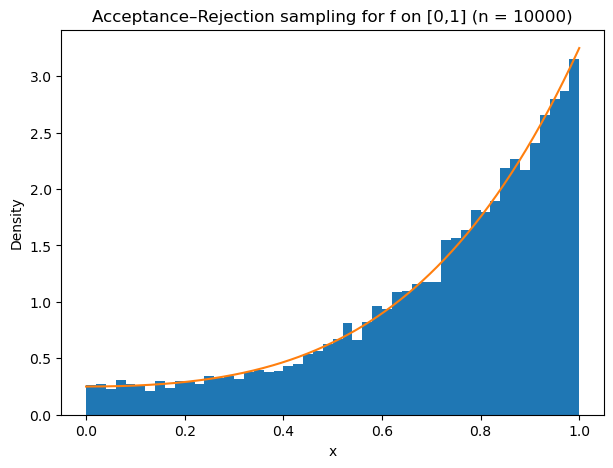

In [12]:
# Acceptance–Rejection sampling for:
#   f(x) = (5x^4 + 4x^3 + 3x^2 + 1)/4  on [0,1], 0 otherwise.

import numpy as np
import matplotlib.pyplot as plt

# Target pdf on [0,1]
def f(x):
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    mask = (0 <= x) & (x <= 1)
    out[mask] = (5*x[mask]**4 + 4*x[mask]**3 + 3*x[mask]**2 + 1) / 4.0
    return out

M = 13.0 / 4.0

def ar_sample(n, seed=0, batch=4096):
    rng = np.random.default_rng(seed)
    out = []
    while len(out) < n:
        m = max(batch, n - len(out))
        x_star = rng.random(m)           # proposals from Uniform(0,1)
        u = rng.random(m)                # uniforms for accept/reject
        accept = u <= f(x_star) / M
        out.extend(x_star[accept])
    return np.array(out[:n]), (np.sum(accept) / m)  # last-batch accept rate

# Draw samples
n = 10000
samples, last_batch_rate = ar_sample(n, seed=42)

emp_accept_rate = len(samples) / (len(samples) + int(n/last_batch_rate) - n)
print("Theoretical acceptance rate = 1/M = ", 1.0/M)
print("Empirical (approx.) acceptance rate =", emp_accept_rate)

xs = np.linspace(0, 1, 400)
plt.figure(figsize=(7,5))
plt.hist(samples, bins=50, density=True)
plt.plot(xs, f(xs))
plt.title("Acceptance–Rejection sampling for f on [0,1] (n = %d)" % n)
plt.xlabel("x")
plt.ylabel("Density")
plt.show()


<hr>

**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?

<hr>

### Ans.

In acceptance–rejection sampling, the probability of accepting a proposal is  

$$
\mathbb{P}(\text{accept}) = \frac{1}{M}.
$$

Here we found  

$$
M = \frac{13}{4},
$$  

so  

$$
\mathbb{P}(\text{accept}) = \frac{4}{13}.
$$

Thus, the expected number of uniform proposals needed to generate one valid sample is  

$$
\frac{1}{\mathbb{P}(\text{accept})} = M = \frac{13}{4} \approx 3.25.
$$


<hr>

**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.

<hr>

Generated 2500 samples using 8192 uniform proposals.
Empirical acceptance rate = 0.3052  (theoretical = 0.3077)
Expected uniforms per accepted sample ≈ 1/(accept rate) ≈ 3.28  (theoretical M = 3.25)


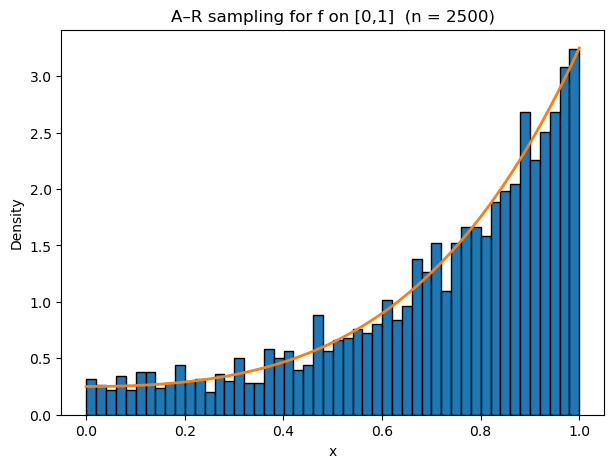

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Target pdf on [0,1]
def f(x):
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    mask = (0 <= x) & (x <= 1)
    out[mask] = (5*x[mask]**4 + 4*x[mask]**3 + 3*x[mask]**2 + 1) / 4.0
    return out

# Proposal g(x)=1 on [0,1], domination constant M = max f = f(1) = 13/4
M = 13.0 / 4.0

def ar_sample(n, seed=0, batch=4096):
    """Return n samples from f via A–R, plus total number of proposals used."""
    rng = np.random.default_rng(seed)
    out = []
    proposals = 0
    while len(out) < n:
        m = max(batch, n - len(out))
        x_star = rng.random(m)        # proposals from Uniform(0,1)
        u = rng.random(m)             # uniforms for accept/reject
        proposals += m
        accept = u <= f(x_star) / M
        out.extend(x_star[accept])
    return np.array(out[:n]), proposals

n = 2500
samples, proposals_used = ar_sample(n, seed=123)

emp_rate = n / proposals_used
theory_rate = 1.0 / M  # = 4/13
print(f"Generated {n} samples using {proposals_used} uniform proposals.")
print(f"Empirical acceptance rate = {emp_rate:.4f}  (theoretical = {theory_rate:.4f})")
print(f"Expected uniforms per accepted sample ≈ 1/(accept rate) ≈ {1/emp_rate:.2f}  (theoretical M = {M:.2f})")

xs = np.linspace(0, 1, 400)
plt.figure(figsize=(7,5))
plt.hist(samples, bins=50, density=True, edgecolor='black')
plt.plot(xs, f(xs), linewidth=2)
plt.title("A–R sampling for f on [0,1]  (n = 2500)")
plt.xlabel("x")
plt.ylabel("Density")
plt.show()


<hr><hr>

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

<hr>

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.

<hr>

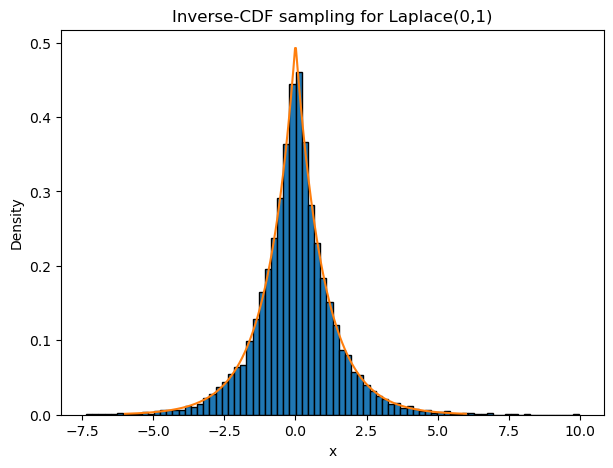

Sample mean: -0.008030177750422382   (theoretical: 0)
Sample var : 2.0109973602365336   (theoretical: 2)


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def laplace_inverse(u):
    """Vectorized inverse-CDF for Laplace(0,1) with pdf 0.5*exp(-|x|)."""
    u = np.asarray(u)
    x = np.empty_like(u, dtype=float)
    left = (u < 0.5)
    x[left]  = np.log(2.0 * u[left])
    x[~left] = -np.log(2.0 * (1.0 - u[~left]))
    return x

def sample_laplace_inverse(n, seed=0):
    """Generate n iid samples from Laplace(0,1) via inverse transform."""
    rng = np.random.default_rng(seed)
    u = rng.random(n)
    return laplace_inverse(u)

# ---------- Demo / sanity check ----------
n = 10000
x = sample_laplace_inverse(n, seed=42)

def laplace_pdf(x):
    return 0.5 * np.exp(-np.abs(x))

# Plot histogram + true pdf
xx = np.linspace(-6, 6, 400)
plt.figure(figsize=(7,5))
plt.hist(x, bins=80, density=True, edgecolor='black')
plt.plot(xx, laplace_pdf(xx))
plt.title("Inverse-CDF sampling for Laplace(0,1)")
plt.xlabel("x")
plt.ylabel("Density")
plt.show()

print("Sample mean:", x.mean(), "  (theoretical: 0)")
print("Sample var :", x.var(),  "  (theoretical: 2)")


<hr>

**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.

<hr>

### Ans.

Minimal k = 1.315489246958914
Theoretical acceptance rate = 1/k = 0.7601734505331403
Expected proposals per accepted sample (theory) = k = 1.315489246958914

Generated 25000 samples with 33192 proposals.
Empirical acceptance rate        = 0.7531935406121957
Empirical proposals per sample   = 1.32768


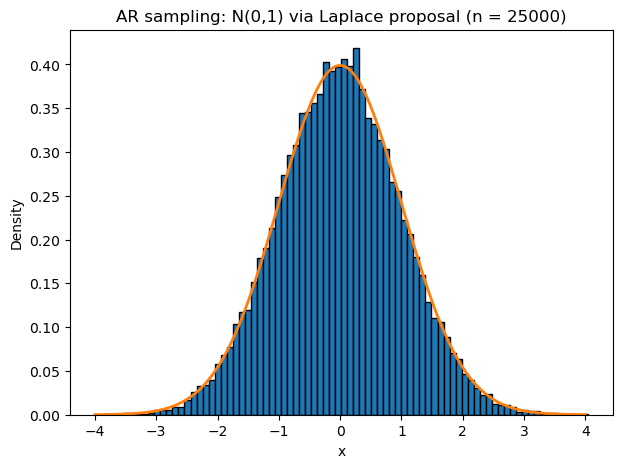

In [19]:
# Q4(b): Acceptance–Rejection for N(0,1) using Laplace proposal g(x) = 0.5*exp(-|x|)
# Tasks:
# 1) Compute the smallest k with k*g(x) >= f(x) for all x (f is N(0,1) pdf).
# 2) Implement AR sampler using this k.
# 3) Report the expected number of proposals per accepted sample (= k) and
#    compare with the empirical acceptance rate.

import numpy as np
import matplotlib.pyplot as plt

# ---- PDFs ----
def f_normal(x):
    return np.exp(-0.5*x**2) / np.sqrt(2*np.pi)  # N(0,1)

def g_laplace(x):
    return 0.5*np.exp(-np.abs(x))                # Laplace(0,1)

# ---- Analytic minimal k ----
# sup_x f(x)/g(x) = sup_{x>=0} (2/sqrt(2pi)) * exp(-x^2/2 + x)
# The exponent -x^2/2 + x is maximized at x=1 with value 1/2.
k_min = np.sqrt(2*np.e/np.pi)   # = (2/√(2π)) * e^{1/2}
print("Minimal k =", k_min)
print("Theoretical acceptance rate = 1/k =", 1.0/k_min)
print("Expected proposals per accepted sample (theory) = k =", k_min)

# ---- Inverse-CDF sampler for Laplace proposal ----
def laplace_inverse(u):
    """Vectorized inverse-CDF for Laplace(0,1) with pdf 0.5*exp(-|x|)."""
    u = np.asarray(u)
    x = np.empty_like(u, dtype=float)
    left = (u < 0.5)
    x[left]  = np.log(2.0*u[left])           # negative branch
    x[~left] = -np.log(2.0*(1.0 - u[~left])) # positive branch
    return x

# ---- Acceptance–Rejection sampler ----
def sample_normal_via_AR(n, seed=0, batch=8192):
    """
    Generate n iid N(0,1) samples using Laplace proposal and optimal k.
    Returns (samples, total_proposals).
    """
    rng = np.random.default_rng(seed)
    X = []
    proposals = 0
    while len(X) < n:
        m = max(batch, n - len(X))
        y = laplace_inverse(rng.random(m))   # proposals Y ~ g
        u = rng.random(m)                    # uniforms
        proposals += m
        accept = u <= f_normal(y) / (k_min * g_laplace(y))
        X.extend(y[accept])
    return np.array(X[:n]), proposals

# ---- Run a demo and sanity-check acceptance rate ----
n = 25000
samples, proposals_used = sample_normal_via_AR(n, seed=123)
emp_accept_rate = n / proposals_used

print("\nGenerated", n, "samples with", proposals_used, "proposals.")
print("Empirical acceptance rate        =", emp_accept_rate)
print("Empirical proposals per sample   =", proposals_used / n)

# Optional: quick visual check
xs = np.linspace(-4, 4, 400)
plt.figure(figsize=(7,5))
plt.hist(samples, bins=80, density=True, edgecolor='black')
plt.plot(xs, f_normal(xs), linewidth=2)
plt.title("AR sampling: N(0,1) via Laplace proposal (n = %d)" % n)
plt.xlabel("x")
plt.ylabel("Density")
plt.show()

<hr>

**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.

<hr>

Total uniforms used = 8192
Average uniforms per sample = 8.192
Theoretical avg = 2*k_min = 2.631
95% CI for uniforms/sample ≈ (1.271, 1.363)


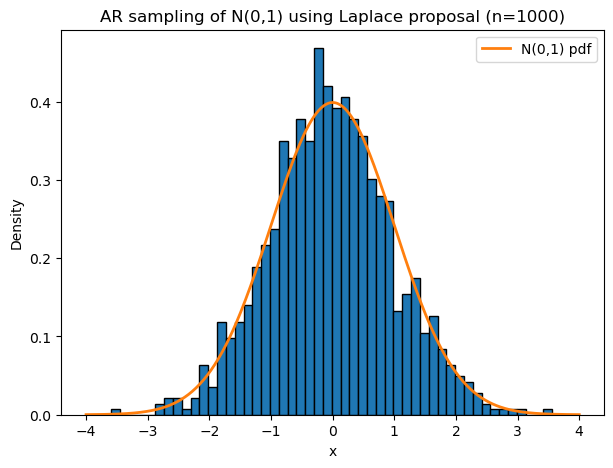

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# ---- PDFs ----
def f_normal(x):
    return np.exp(-0.5*x**2) / np.sqrt(2*np.pi)

def g_laplace(x):
    return 0.5*np.exp(-np.abs(x))

# Optimal k found in (b)
k_min = np.sqrt(2*np.e/np.pi)

# Inverse CDF sampler for Laplace(0,1)
def laplace_inverse(u):
    u = np.asarray(u)
    x = np.empty_like(u, dtype=float)
    left = (u < 0.5)
    x[left]  = np.log(2.0*u[left])
    x[~left] = -np.log(2.0*(1.0 - u[~left]))
    return x

# Acceptance–Rejection sampler (returns both samples and total uniforms used)
def sample_normal_via_AR(n, seed=0, batch=4096):
    rng = np.random.default_rng(seed)
    X = []
    total_uniforms = 0
    while len(X) < n:
        m = max(batch, n - len(X))
        u1 = rng.random(m)         # uniforms for Laplace inverse
        y = laplace_inverse(u1)    # proposals from Laplace
        u2 = rng.random(m)         # uniforms for accept/reject
        total_uniforms += 2*m      # two uniforms used per proposal
        accept = u2 <= f_normal(y) / (k_min * g_laplace(y))
        X.extend(y[accept])
    return np.array(X[:n]), total_uniforms

# ---- Generate 1000 samples ----
n = 1000
samples, uniforms_used = sample_normal_via_AR(n, seed=123)

# Average uniforms per accepted sample
avg_uniforms = uniforms_used / n

# 95% CI for number of uniforms needed per sample
accept_rate = 1.0 / k_min
se = np.sqrt(accept_rate*(1-accept_rate)/n)   # std error of acceptance rate
ci_low = (1/(accept_rate+1.96*se))
ci_high = (1/(accept_rate-1.96*se))

print(f"Total uniforms used = {uniforms_used}")
print(f"Average uniforms per sample = {avg_uniforms:.3f}")
print(f"Theoretical avg = 2*k_min = {2*k_min:.3f}")
print(f"95% CI for uniforms/sample ≈ ({ci_low:.3f}, {ci_high:.3f})")

xs = np.linspace(-4, 4, 400)
plt.figure(figsize=(7,5))
plt.hist(samples, bins=50, density=True, edgecolor='black')
plt.plot(xs, f_normal(xs), linewidth=2, label="N(0,1) pdf")
plt.title("AR sampling of N(0,1) using Laplace proposal (n=1000)")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()


<hr>

**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.

<hr>

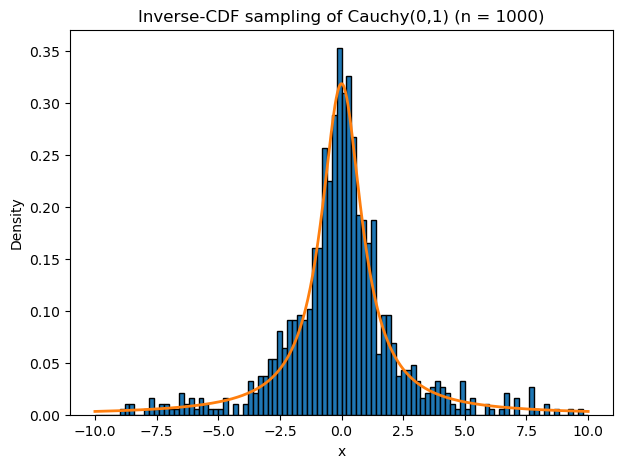

Sample median (theoretical 0): -0.016262072527363405
Fraction of samples with |x| > 10 (heavy tails): 0.064


In [24]:
import numpy as np
import matplotlib.pyplot as plt

def cauchy_inverse(u):
    """Vectorized inverse-CDF for standard Cauchy."""
    return np.tan(np.pi*(u - 0.5))

def sample_cauchy(n, seed=0):
    rng = np.random.default_rng(seed)
    u = rng.random(n)
    return cauchy_inverse(u)

n = 1000
x = sample_cauchy(n, seed=42)

def cauchy_pdf(x):
    return 1.0 / (np.pi * (1.0 + x**2))

# plot histogram (truncate x-axis to show the bulk; Cauchy has heavy tails)
xs = np.linspace(-10, 10, 800)
plt.figure(figsize=(7,5))
plt.hist(x, bins=100, density=True, range=(-10,10), edgecolor='black')
plt.plot(xs, cauchy_pdf(xs), linewidth=2)
plt.title("Inverse-CDF sampling of Cauchy(0,1) (n = 1000)")
plt.xlabel("x")
plt.ylabel("Density")
plt.show()

print("Sample median (theoretical 0):", np.median(x))
print("Fraction of samples with |x| > 10 (heavy tails):", np.mean(np.abs(x) > 10))

<hr>

**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.

<hr>

### Ans.

Minimal k = 1.5203469010662807
Theoretical acceptance rate = 0.657744623479457
Expected uniforms per accepted sample (theory) = 2*k = 3.0406938021325614

Generated 1000 samples using 16384 uniforms.
Empirical acceptance rate ≈ 0.1221  (theory 0.6577)
Average uniforms per sample = 16.384
95% CI for uniforms/sample ≈ (2.911, 3.183)
Theoretical expectation = 2*k = 3.041


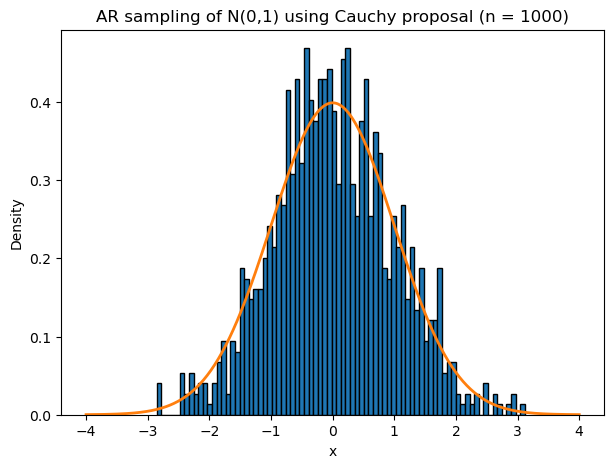

In [25]:
# Q4(e): Repeat parts (b) & (c) using the Cauchy proposal g(x) = 1 / [π(1+x^2)]
# - Find the smallest k with k g(x) ≥ f(x) (f is N(0,1) pdf)
# - Acceptance–Rejection sampler using this proposal
# - Generate 1000 samples, plot histogram vs true N(0,1) pdf
# - Report average and 95% CI for number of U[0,1] uniforms needed

import numpy as np
import matplotlib.pyplot as plt

# ---- PDFs ----
def f_normal(x):
    return np.exp(-0.5*x**2) / np.sqrt(2*np.pi)  # N(0,1)

def g_cauchy(x):
    return 1.0 / (np.pi * (1.0 + x**2))          # Cauchy(0,1)

# ---- Minimal k for Cauchy proposal ----
# sup_x f/g = (π/√(2π)) * sup_x (1 + x^2) e^{-x^2/2}
# The inner term is maximized at x = ±1 with value 2 e^{-1/2}
# => k = √(2π) e^{-1/2}
k_cauchy = np.sqrt(2*np.pi) * np.exp(-0.5)
p_accept_theory = 1.0 / k_cauchy            # theoretical acceptance prob
print("Minimal k =", k_cauchy)
print("Theoretical acceptance rate =", p_accept_theory)
print("Expected uniforms per accepted sample (theory) = 2*k =", 2*k_cauchy)

# ---- Inverse-CDF sampler for Cauchy(0,1) ----
def cauchy_inverse(u):
    return np.tan(np.pi*(u - 0.5))

# ---- AR sampler using Cauchy proposal ----
def sample_normal_AR_cauchy(n, seed=0, batch=8192):
    """
    Generate n iid N(0,1) samples using Cauchy(0,1) proposal and optimal k.
    Returns (samples, total_uniforms_used).
    Each proposal consumes 2 uniforms: one for inverse-CDF, one for accept/reject.
    """
    rng = np.random.default_rng(seed)
    X = []
    total_uniforms = 0
    while len(X) < n:
        m = max(batch, n - len(X))
        u1 = rng.random(m)                # for Cauchy inverse
        y  = cauchy_inverse(u1)           # proposals Y ~ g
        u2 = rng.random(m)                # for acceptance test
        total_uniforms += 2*m
        accept = u2 <= f_normal(y) / (k_cauchy * g_cauchy(y))
        X.extend(y[accept])
    return np.array(X[:n]), total_uniforms

# ---- Generate 1000 samples and report stats ----
n = 1000
samples, uniforms_used = sample_normal_AR_cauchy(n, seed=2025)

avg_uniforms_per_sample = uniforms_used / n
emp_accept_rate = (2*n) / uniforms_used      # since uniforms_used = 2 * proposals
# Wald 95% CI for uniforms per sample using theoretical acceptance p
se_p = np.sqrt(p_accept_theory*(1 - p_accept_theory) / n)
ci_low  = 2.0 / (p_accept_theory + 1.96*se_p)
ci_high = 2.0 / (p_accept_theory - 1.96*se_p)

print(f"\nGenerated {n} samples using {uniforms_used} uniforms.")
print(f"Empirical acceptance rate ≈ {emp_accept_rate:.4f}  (theory {p_accept_theory:.4f})")
print(f"Average uniforms per sample = {avg_uniforms_per_sample:.3f}")
print(f"95% CI for uniforms/sample ≈ ({ci_low:.3f}, {ci_high:.3f})")
print(f"Theoretical expectation = 2*k = {2*k_cauchy:.3f}")

# ---- Plot histogram vs true normal pdf ----
xs = np.linspace(-4, 4, 400)
plt.figure(figsize=(7,5))
plt.hist(samples, bins=80, density=True, edgecolor='black')
plt.plot(xs, f_normal(xs), linewidth=2)
plt.title("AR sampling of N(0,1) using Cauchy proposal (n = 1000)")
plt.xlabel("x")
plt.ylabel("Density")
plt.show()
